In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from jupyterthemes import stylefx
stylefx.set_nb_theme('monokai')

In [22]:
mean1=np.array([5,5])
cov1=np.array([[1,0],[0,1]])
class1=np.random.multivariate_normal(mean1,cov1,2000)

In [33]:
mean2=np.array([10,8])
cov2=np.array([[1,0],[0,1]])
class2=np.random.multivariate_normal(mean2,cov2,2000)

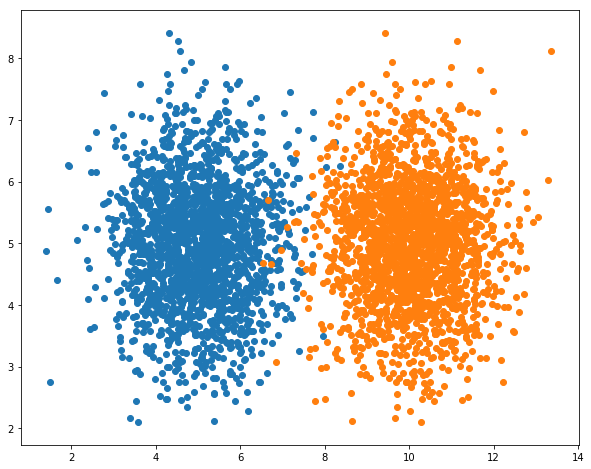

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class1[:,1])

In [35]:
data_X=np.append(class1,class2,axis=0)
data_Y=np.append(np.zeros(2000),np.ones(2000))

In [36]:
X=tf.placeholder(dtype=tf.float32)
Y=tf.placeholder(dtype=tf.float32)

m=tf.Variable(tf.random_normal(shape=[2,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))

z=tf.matmul(X,m)+b

loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=Y))

opt=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=opt.minimize(loss)

init=tf.global_variables_initializer()


In [37]:
n_epochs =1000
with tf.Session() as sess:
    sess.run(init)
    for i in range(n_epochs):
        train_e, loss_e, m_e, b_e=sess.run([train,loss,m,b], feed_dict={X:data_X, Y:data_Y})
        print(loss_e)
    print("FINAL : ", loss_e, m_e, b_e)

3.5537736
3.529399
3.5046437
3.480957
3.4565353
3.4325237
3.4064722
3.3828013
3.3600714
3.3356202
3.3098052
3.2870355
3.262667
3.2377114
3.2141948
3.1912034
3.166704
3.1424363
3.1193483
3.0945792
3.070939
3.0460472
3.023196
3.0010946
2.9767532
2.951513
2.9300754
2.9051378
2.881715
2.857037
2.8345883
2.812297
2.7879524
2.764798
2.741773
2.7194736
2.694818
2.6702483
2.6478348
2.6265738
2.602374
2.5803497
2.557033
2.534519
2.511025
2.4871407
2.4654596
2.4434354
2.42128
2.399032
2.376552
2.353856
2.3317738
2.310015
2.2871706
2.2657232
2.2437778
2.2224286
2.200662
2.1791747
2.1572232
2.13571
2.114467
2.093253
2.0723882
2.0509467
2.030373
2.009657
1.9882551
1.9680504
1.9475921
1.9277488
1.9068823
1.8858488
1.8674636
1.8475285
1.8277928
1.8067535
1.7878208
1.7689507
1.7499492
1.7303137
1.7119048
1.6923555
1.6742862
1.6555241
1.6375071
1.6194242
1.6011733
1.5844032
1.5663573
1.548963
1.5314834
1.5143694
1.4979542
1.4810592
1.4650134
1.4492128
1.433701
1.417845
1.4017224
1.3870628
1.3712109
1.3

0.7659683
0.7659064
0.7658844
0.76583654
0.765799
0.76577175
0.7657573
0.7656824
0.76562583
0.765612
0.7655728
0.76554835
0.7654969
0.76551265
0.7654834
0.76550126
0.7654748
0.7654225
0.76535
0.7653069
0.76528245
0.7652327
0.765117
0.7650774
0.7650781
0.765
0.7649392
0.7648944
0.7648623
0.7648233
0.7647957
0.76478195
0.7647823
0.7646883
0.7646472
0.7645735
0.76456016
0.7644603
0.7643899
0.76431525
0.76429
0.764239
0.76415706
0.76412624
0.76408345
0.7640541
0.7640475
0.76399964
0.7639899
0.76394534
0.7639339
0.763934
0.76385903
0.76384294
0.76381844
0.7637321
0.7636725
0.76362646
0.7635833
0.76358676
0.76359856
0.76356274
0.7635377
0.7634828
0.76346177
0.76347786
0.7634352
0.7633484
0.7633287
0.7633439
0.7633386
0.7632992
0.7633056
0.7632367
0.7631881
0.7630617
0.76305
0.7629714
0.7629253
0.76287466
0.76283014
0.76281285
0.7627812
0.7627582
0.76276
0.7626774
0.762586
0.7625204
0.7624999
0.76243126
0.7624184
0.7623405
0.7622965
0.76228374
0.76226383
0.762282
0.76226896
0.7622043
0.762163

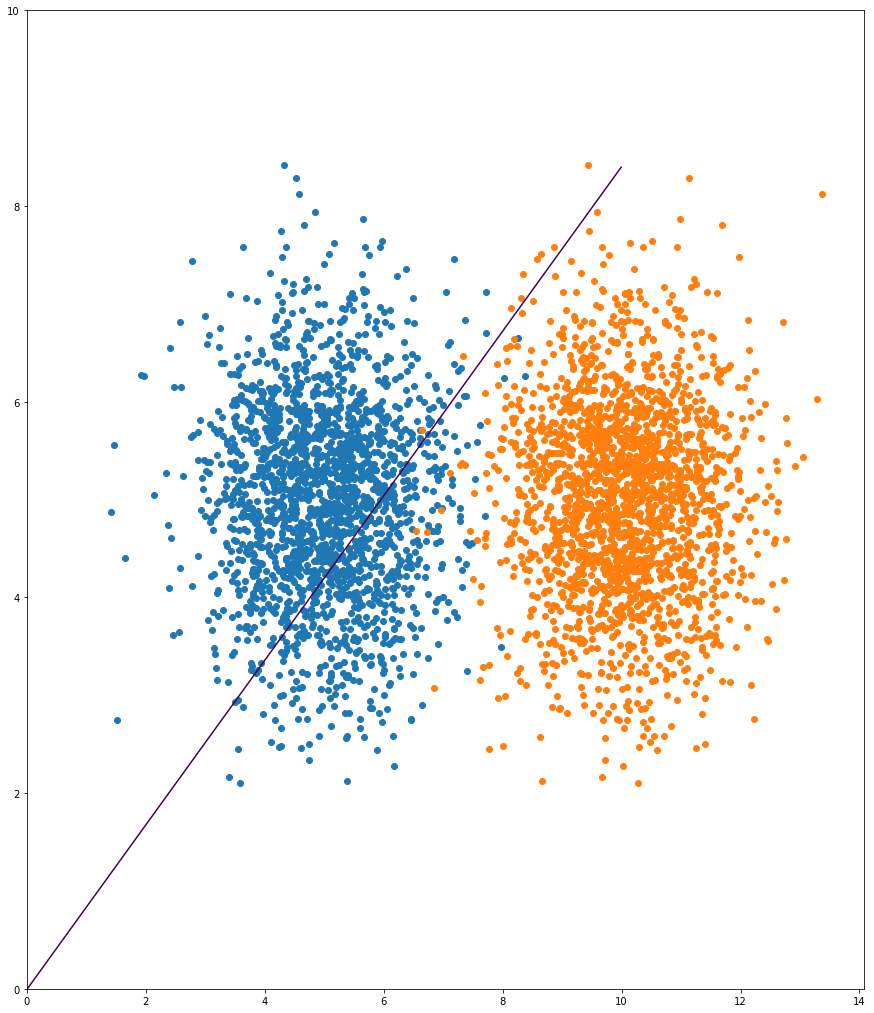

In [38]:
x=np.linspace(0,10.0,100)
y=np.linspace(0,10.0,100)

Xp,Yp = np.meshgrid(x,y)

F=Xp*m_e[0] + Yp*m_e[1]+b_e
plt.figure(figsize=(15,18))
plt.contour(Xp,Yp,F,[0])

plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class1[:,1])